# **Multiple Linear Regression with Python**

Importing dependecies

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


**Data Collection and Analysis**

Import the dataset

In [113]:
# use pd.read_csv() to import the data
df=pd.read_csv("/content/housing.csv")

In [114]:
# printing the first 5 rows of the dataset
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [115]:
# number of rows and Columns in this dataset
df.shape

(5000, 7)

In [116]:
# getting the statistical measures of the data
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [117]:
#chiking the missing values in dataset
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

So there is no missing value in this dataset

In [118]:
#spliting the data into features and target
X=df.drop(columns=['Price','Address'],axis=1)
y=df['Price']

** Data Modeling **

In [119]:
# Create a linear regression object
df_reg=LinearRegression()

In [120]:
type(df_reg)

sklearn.linear_model._base.LinearRegression

Fitting the model

In [121]:
df_reg.fit(X,y)

LinearRegression()

Cheking the parameters

In [122]:
print("the model intercept value is {:.3f}".format(df_reg.intercept_))

the model intercept value is -2637299.033


In [123]:
# zipping coefficients with their names
list(zip(df.columns[1:],df_reg.coef_))

[('Avg. Area House Age', 21.57804944834946),
 ('Avg. Area Number of Rooms', 165637.0269408715),
 ('Avg. Area Number of Bedrooms', 120659.94881629439),
 ('Area Population', 1651.139054028224),
 ('Price', 15.200743923749542)]

In [124]:
# print the parameters 
for var,coef in list(zip(df.columns[1:], df_reg.coef_)):
    print("The {0:7s} coefficient is : {1:8.4f}".format(var,coef))

The Avg. Area House Age coefficient is :  21.5780
The Avg. Area Number of Rooms coefficient is : 165637.0269
The Avg. Area Number of Bedrooms coefficient is : 120659.9488
The Area Population coefficient is : 1651.1391
The Price   coefficient is :  15.2007


In [125]:
results =pd.DataFrame(list(zip(df.columns[1:],df_reg.coef_)),
                      columns=["Variable","Coefficient"])
results

,Variable,Coefficient
0,Avg. Area House Age,21.578049
1,Avg. Area Number of Rooms,165637.026941
2,Avg. Area Number of Bedrooms,120659.948816
3,Area Population,1651.139054
4,Price,15.200744


Prediction

In [126]:
#prediction
y_pred=df_reg.predict(X)

Model Performance

In [127]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [128]:
# print the R^2
print("R^2(Cofficient of determination):{:4.4f}".format(r2_score(y,y_pred)))

R^2(Cofficient of determination):0.9180


In [129]:
# The mean squared error
print("mean squared error:{:4.4f}".format(mean_squared_error(y,y_pred)))

mean squared error:10219734313.2530


In [130]:
# The Root Mean squared Error 
print("The Root Mean squared error: {:.4f}".format(np.sqrt(mean_squared_error(y, y_pred))))

The Root Mean squared error: 101092.7016


In [131]:
# mean abolute error
print("mean abolute error:{:4.4f}".format(mean_absolute_error(y,y_pred)))

mean abolute error:81359.2702


# **Machine Learning Process**

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
#Create the training and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=10123)

In [134]:
#print shape of the training and test dataset
print(X.shape,X_train.shape,X_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(5000, 5) (4500, 5) (500, 5)
(5000,) (4500,) (500,)


Model training

In [135]:
#create a line regression object
X_reg=LinearRegression()

In [136]:
#fit the model on the training set 
X_reg.fit(X_train,y_train)

LinearRegression()

Prediction

In [137]:
#Prdict on train set
pred_train=X_reg.predict(X_train)
#Predict on test set
pred_test=X_reg.predict(X_test)

Model Evaluation

In [138]:
# The R^2 Score
print("The R^2 on the train set is: {:.4f}".format(r2_score(pred_train, y_train)))

The R^2 on the train set is: 0.9116


In [139]:
# The R^2 Score
print("The R^2 on the test set is: {:.4f}".format(r2_score(pred_test, y_test)))

The R^2 on the test set is: 0.9050


In [140]:
print("The MSE on the train set is: {:.4f}".\
      format(mean_squared_error(y_train, pred_train)))

The MSE on the train set is: 10188894743.7997


In [141]:
print("The MSE on the test set is: {:.4f}".\
      format(mean_squared_error(y_test, pred_test)))

The MSE on the test set is: 10510226936.6937


In [142]:
print("The RMSE on the train set is: {:.4f}".\
      format(np.sqrt(mean_squared_error(y_train, pred_train))))

The RMSE on the train set is: 100940.0552


In [143]:
print("The RMSE on the test set is: {:.4f}".\
      format(np.sqrt(mean_squared_error(y_test, pred_test))))

The RMSE on the test set is: 102519.3979


Model Diagnostics (Residual Plot)

In [144]:
# calculate the residuals
resid_train = y_train - pred_train
resid_test = y_test-pred_test

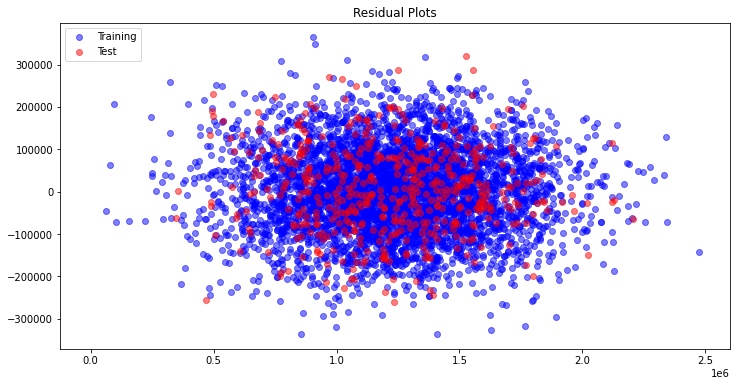

In [145]:
# Scatter plot the training data
plt.figure(figsize= (12, 6))
train = plt.scatter(x = pred_train, y = resid_train , c = 'b', alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test, resid_test , c = 'r', alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y = 0, xmin = -10, xmax = 50)

# Labels
plt.legend((train, test), ('Training','Test'), loc='upper left')
plt.title('Residual Plots')
plt.show()